<a href="https://colab.research.google.com/github/2001harsh-mehra/vehicle-image-classification/blob/main/1_CNN_without_data_augmentation_Vehicle_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile as vehiclezip
import os as os_veh
import matplotlib.pyplot as pltveh
import matplotlib.image as mpimgveh
import shutil as shut_veh
from sklearn.model_selection import train_test_split as tts_veh
from tensorflow.keras.preprocessing.image import ImageDataGenerator as imgg_gen_veh
import numpy as npveh
from tensorflow.keras.preprocessing.image import load_img as ld_img_veh, img_to_array as img_2_ary_veh

In [4]:
vehicle_base_drive = '/content/drive/MyDrive/Vehicle Classification'
vehicle_zip_dir = os_veh.path.join(vehicle_base_drive, 'vehicles.zip')
vehicle_extract_dir = '/content/vehicle_data'

with vehiclezip.ZipFile(vehicle_zip_dir, 'r') as zip_ref:
    zip_ref.extractall(vehicle_extract_dir)
print("Unzipping done. Vehicle images are now ready!")

vehicle_main_dir = os_veh.path.join(vehicle_extract_dir, 'Vehicles')

for clas_vehicle in os_veh.listdir(vehicle_main_dir):
    clas_path_veh = os_veh.path.join(vehicle_main_dir, clas_vehicle)
    if os_veh.path.isdir(clas_path_veh):
        pictures = os_veh.listdir(clas_path_veh)
        full_veh_cnt = len(pictures)
        print(f"Vehicle Class: {clas_vehicle} — Total number of images: {full_veh_cnt}")

Unzipping done. Vehicle images are now ready!
Vehicle Class: Auto Rickshaws — Total number of images: 800
Vehicle Class: Planes — Total number of images: 800
Vehicle Class: Bikes — Total number of images: 800
Vehicle Class: Trains — Total number of images: 800
Vehicle Class: Ships — Total number of images: 800
Vehicle Class: Motorcycles — Total number of images: 800
Vehicle Class: Cars — Total number of images: 790


Data Splitting


In [5]:
split_output_dir = os_veh.path.join('/content', 'vehicle_data_split')
tt_rto = 0.2  # 20% data taken for testing

# Create train and test folders
for veh_foldr in ['train', 'test']:
    os_veh.makedirs(os_veh.path.join(split_output_dir, veh_foldr), exist_ok=True)

#Splitting and copying vehicle images
for clas_vehicle in os_veh.listdir(vehicle_main_dir):
    clas_path_veh = os_veh.path.join(vehicle_main_dir, clas_vehicle)
    if not os_veh.path.isdir(clas_path_veh):
        continue

    all_pics = os_veh.listdir(clas_path_veh)
    tn_pics, tt_pics = tts_veh(all_pics, test_size=tt_rto, random_state=42)

    for split_type, image_list in [('train', tn_pics), ('test', tt_pics)]:
        dest_direc = os_veh.path.join(split_output_dir, split_type, clas_vehicle)
        os_veh.makedirs(dest_direc, exist_ok=True)
        for picc in image_list:
            shut_veh.copy(os_veh.path.join(clas_path_veh, picc), os_veh.path.join(dest_direc, picc))

            print("Dataset successfully splitted into training and testing sets!")
for split_type in ['train', 'test']:
    print(f"\n {split_type.upper()} SET:")
    split_path = os_veh.path.join(split_output_dir, split_type)
    for clas_vehicle in os_veh.listdir(split_path):
        img_count = len(os_veh.listdir(os_veh.path.join(split_path, clas_vehicle)))
        print(f"{clas_vehicle}: {img_count} images")
    print('-' * 80)

Streaming output truncated to the last 5000 lines.
Dataset successfully splitted into training and testing sets!
Dataset successfully splitted into training and testing sets!
Dataset successfully splitted into training and testing sets!
Dataset successfully splitted into training and testing sets!
Dataset successfully splitted into training and testing sets!
Dataset successfully splitted into training and testing sets!
Dataset successfully splitted into training and testing sets!
Dataset successfully splitted into training and testing sets!
Dataset successfully splitted into training and testing sets!
Dataset successfully splitted into training and testing sets!
Dataset successfully splitted into training and testing sets!
Dataset successfully splitted into training and testing sets!
Dataset successfully splitted into training and testing sets!
Dataset successfully splitted into training and testing sets!
Dataset successfully splitted into training and testing sets!
Dataset successfull

Image Preprocessing

Found 4469 images belonging to 7 classes.
Found 1118 images belonging to 7 classes.
All vehicle images are successfully resized to 224x224 and rescaled to [0, 1] range.
Batch size: 32 | Label format: One-hot encoded categorical


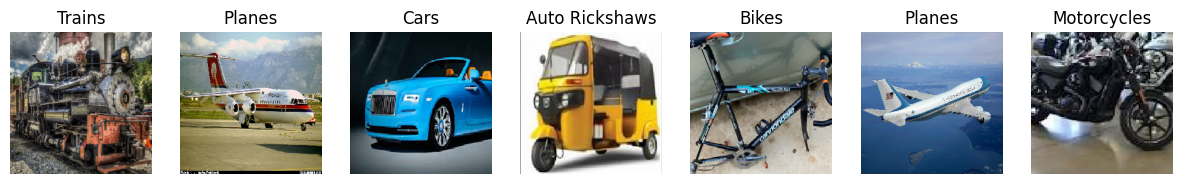

In [6]:
random_seed = 42

# rescaling the vehicle images
veh_img_genn = imgg_gen_veh(rescale=1./255)
sze_veh = (224, 224) # target size
sze_bch = 32  #batch size
one_hot_veh = 'categorical' # class mode


#training data path
vehicle_trn_pics = veh_img_genn.flow_from_directory(
    os_veh.path.join(split_output_dir, 'train'),
    target_size = sze_veh,
    batch_size = sze_bch,
    class_mode = one_hot_veh,
    shuffle=True,
    seed=random_seed
)

#testing data path
vehicle_tst_pics = veh_img_genn.flow_from_directory(
    os_veh.path.join(split_output_dir, 'test'),
    target_size = sze_veh,
    batch_size = sze_bch,
    class_mode = one_hot_veh,
    shuffle=False,
    seed=random_seed
)
print("All vehicle images are successfully resized to 224x224 and rescaled to [0, 1] range.")
print("Batch size: 32 | Label format: One-hot encoded categorical")

veh_pics, veh_lbls = next(vehicle_trn_pics)
pltveh.figure(figsize=(15, 5))
for iv in range(7):
    pltveh.subplot(1, 7, iv + 1)
    pltveh.imshow(veh_pics[iv])
    lbl_veh_idx = npveh.argmax(veh_lbls[iv])
    clas_veh_nme = list(vehicle_trn_pics.class_indices.keys())[lbl_veh_idx]
    pltveh.title(clas_veh_nme)
    pltveh.axis('off')
pltveh.show()

In [7]:
print("Class index mapping:", vehicle_trn_pics.class_indices)

Class index mapping: {'Auto Rickshaws': 0, 'Bikes': 1, 'Cars': 2, 'Motorcycles': 3, 'Planes': 4, 'Ships': 5, 'Trains': 6}


Data Augmentation

In [8]:
random_seed = 42

### Define augmentation settings using ImageDataGenerator
augment_train_veh_gen = imgg_gen_veh(
    rescale=1./255,                   # Normalize pixel values to [0, 1]
    rotation_range=20,                # Randomly rotate images by ±20 degrees
    width_shift_range=0.1,            # Shift images horizontally by ±10%
    height_shift_range=0.1,           # Shift images vertically by ±10%
    shear_range=0.1,                  # Apply shear transformation
    zoom_range=0.1,                   # Random zoom in/out by ±10%
    horizontal_flip=True,             # Randomly flip images horizontally
    fill_mode='nearest'               # Fill in missing pixels after transformation
)

###defining path for augmented training vehicle images
vehicle_trn_augument_pics = os_veh.path.join(split_output_dir, 'train')

###Creating augmented training vehicle images data generator
augmented_vehicle_trn_pics = augment_train_veh_gen.flow_from_directory(
    vehicle_trn_augument_pics,
    target_size=sze_veh,
    batch_size=sze_bch,
    class_mode=one_hot_veh,
    shuffle=True,
    seed=random_seed
)
print("Successfully created the Augmented training vehicle image generator")

Found 4469 images belonging to 7 classes.
Successfully created the Augmented training vehicle image generator


Visualizing some of the Augmentation techniques applied in a single Vehicle image

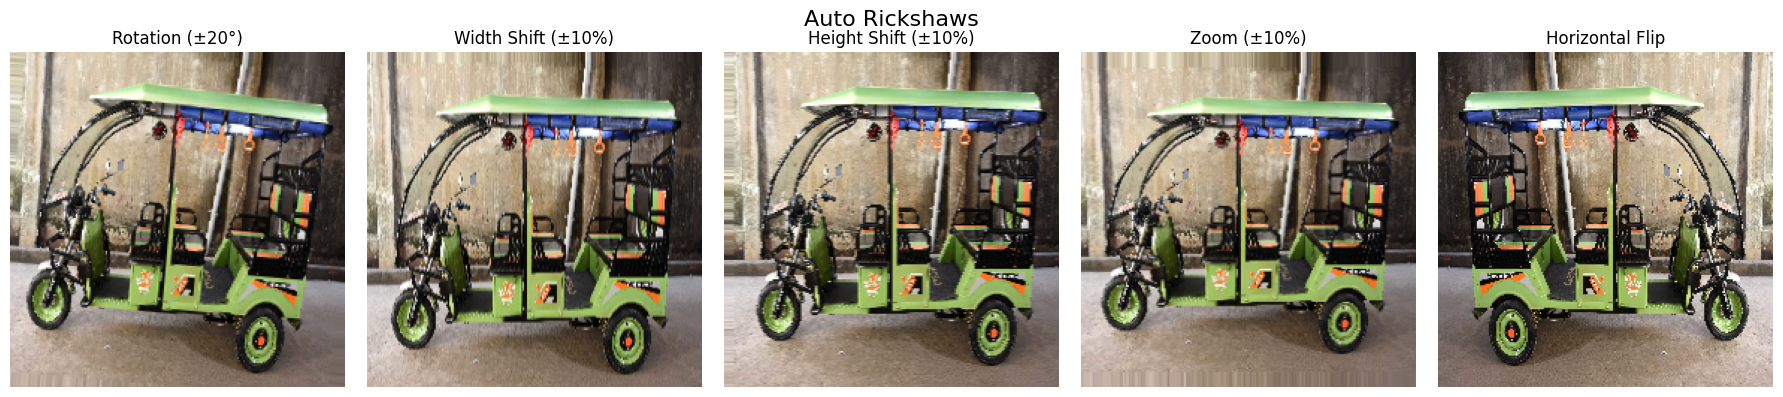

In [9]:
veh_augment_generator = [
    ('Rotation (±20°)', imgg_gen_veh(rotation_range=20)),
    ('Width Shift (±10%)', imgg_gen_veh(width_shift_range=0.1)),
    ('Height Shift (±10%)', imgg_gen_veh(height_shift_range=0.1)),
    ('Zoom (±10%)', imgg_gen_veh(zoom_range=0.1)),
    ('Horizontal Flip', imgg_gen_veh(horizontal_flip=True))
]

vehicle_nam = list(augmented_vehicle_trn_pics.class_indices.keys())

veh_name_aug = vehicle_nam[0]  # visualizing for autorickshaw

one_clas_path = os_veh.path.join(split_output_dir, 'train', veh_name_aug)
sample_veh_pic_nam = os_veh.listdir(one_clas_path)[1]
veh_pic_path = os_veh.path.join(one_clas_path, sample_veh_pic_nam)
veh_pic = ld_img_veh(veh_pic_path, target_size=(224, 224))
veh_pic_aray = img_2_ary_veh(veh_pic)
veh_pic_aray = npveh.expand_dims(veh_pic_aray, axis=0)

pltveh.figure(figsize=(18, 4))
pltveh.suptitle(f"{veh_name_aug}", fontsize=16)

for iv, (aug_veh_nam, aug_veh_gen) in enumerate(veh_augment_generator):
    aug_veh_pic = next(aug_veh_gen.flow(veh_pic_aray, batch_size=1, seed=42))[0].astype('uint8')
    pltveh.subplot(1, 5, iv + 1)
    pltveh.imshow(aug_veh_pic)
    pltveh.title(aug_veh_nam)
    pltveh.axis('off')

pltveh.tight_layout()
pltveh.show()

CNN - without data augmentation

In [10]:
from tensorflow.keras.models import Sequential as seq_veh
from tensorflow.keras.layers import Conv2D as conv_veh, MaxPooling2D as maxpool_veh, Flatten as flat_veh, Dense as dens_veh
from tensorflow.keras.layers import Dropout as drop_veh, BatchNormalization as batchnorm_veh
from tensorflow.keras.optimizers import Adam as adamveh
from sklearn.metrics import classification_report as class_veh
from sklearn.metrics import confusion_matrix as conf_veh
import seaborn as snsveh
import warnings as warn
warn.filterwarnings('ignore')

In [11]:
cnn_act_functn = 'relu'
veh_in_shap = (224, 224, 3)
num_veh_clas = 7


In [12]:
model_cnn_vehicle = seq_veh([
    conv_veh(32, (3, 3), activation=cnn_act_functn, input_shape=veh_in_shap),
    batchnorm_veh(),
    maxpool_veh(pool_size=(2, 2)),

    conv_veh(64, (3, 3), activation=cnn_act_functn),
    batchnorm_veh(),
    maxpool_veh(pool_size=(2, 2)),

    conv_veh(128, (3, 3), activation=cnn_act_functn),
    batchnorm_veh(),
    maxpool_veh(pool_size=(2, 2)),

    flat_veh(),
    dens_veh(128, activation=cnn_act_functn),
    drop_veh(0.5),
    dens_veh(64, activation=cnn_act_functn),
    drop_veh(0.3),
    dens_veh(num_veh_clas, activation='softmax')
])

model_cnn_vehicle.compile(optimizer=adamveh(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model_cnn_vehicle.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,178,567 (42.64 MB)

 Trainable params: 11,178,119 (42.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
cnn_epoch_hist = model_cnn_vehicle.fit(vehicle_trn_pics , epochs = 20)

cnn_acc_veh = cnn_epoch_hist.history['accuracy']
cnn_loss_veh = cnn_epoch_hist.history['loss']
epochs_range = range(1, len(cnn_acc_veh) + 1)

pltveh.figure(figsize=(10, 6))
pltveh.plot(epochs_range, cnn_acc_veh, label='Training Accuracy', marker='o')
pltveh.plot(epochs_range, cnn_loss_veh, label='Training Loss', marker='x')
pltveh.title('CNN model without data augmentation - Training Accuracy and Loss over Epochs')
pltveh.xlabel('20 Epochs')
pltveh.ylabel('Value')
pltveh.legend()
pltveh.grid(True)
pltveh.show()


Epoch 1/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 820s 6s/step - accuracy: 0.4040 - loss: 1.5524
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 833s 6s/step - accuracy: 0.4747 - loss: 1.4200
Epoch 3/20
 29/140 ━━━━━━━━━━━━━━━━━━━━ 10:39 6s/step - accuracy: 0.5448 - loss: 1.2491

In [ ]:
### Predict on test images and convert predictions to class labels
y_pred_veh_tst = model_cnn_vehicle.predict(vehicle_tst_pics)
y_true_label_veh_tst = vehicle_tst_pics.classes[vehicle_tst_pics.index_array]
y_pred_veh_clas = npveh.argmax(y_pred_veh_tst, axis=1)
vehicle_nam = list(vehicle_tst_pics.class_indices.keys())

print("Classifcation Report of Testing CNN without data augmentation")
print(class_veh(y_true_label_veh_tst, y_pred_veh_clas, target_names=vehicle_nam))

### Generating and plotting the confusion matrix
conf_tst = conf_veh(y_true_label_veh_tst, y_pred_veh_clas)

pltveh.figure(figsize=(10, 7))
snsveh.heatmap(conf_tst, annot=True, fmt='d', xticklabels=vehicle_nam, yticklabels=vehicle_nam, cmap='Blues')
pltveh.xlabel('Predicted Label')
pltveh.ylabel('True Label')
pltveh.title('Testing CNN without data augmentation')
pltveh.tight_layout()
pltveh.show()